<a href="https://colab.research.google.com/github/here-is-written-a-serious-username/Python_lesson_Colaboratory/blob/homework/Python_homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
response_t = requests.get("https://uadata.net/work-positions/cities.json?o=Тернопіль")
data_json_t = response_t.json()

In [71]:
response_z = requests.get("https://uadata.net/work-positions/cities.json?o=Запоріжжя")
data_json_z = response_z.json()

In [72]:
df_t = pd.DataFrame(data_json_t["data"])
df_z = pd.DataFrame(data_json_z["data"])

In [73]:
df_t["at"] = pd.to_datetime(df_t["at"])
df_t=df_t.rename(columns = {"at": "Дата", "val":"Вакансії"})
df_t.set_index('Дата', inplace=True)

In [74]:
df_t['Вакансії']= df_t['Вакансії'].replace(0, np.nan)
df_t['Вакансії']= df_t['Вакансії'].interpolate()
df_t['rolling_mean'] = df_t['Вакансії'].rolling(window=7).mean()

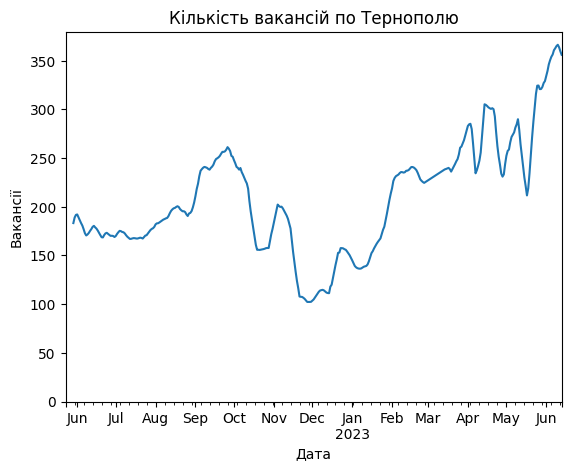

In [75]:
df_t['rolling_mean'].plot()
plt.title("Кількість вакансій по Тернополю")
plt.xlabel('Дата')
plt.ylabel('Вакансії')
plt.ylim(bottom=0)
plt.show()

In [76]:
df_z["at"] = pd.to_datetime(df_z["at"])
df_z=df_z.rename(columns = {"at": "Дата", "val":"Вакансії"})
df_z.set_index('Дата', inplace=True)
df_z['Вакансії']= df_z['Вакансії'].replace(0, np.nan)
df_z['Вакансії']= df_z['Вакансії'].interpolate()
df_z['rolling_mean'] = df_z['Вакансії'].rolling(window=7).mean()

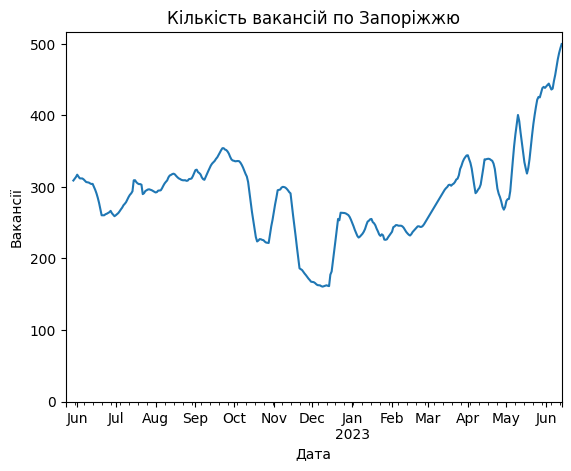

In [77]:
df_z['rolling_mean'].plot()
plt.title("Кількість вакансій по Запоріжжю")
plt.xlabel('Дата')
plt.ylabel('Вакансії')
plt.ylim(bottom=0)
plt.show()

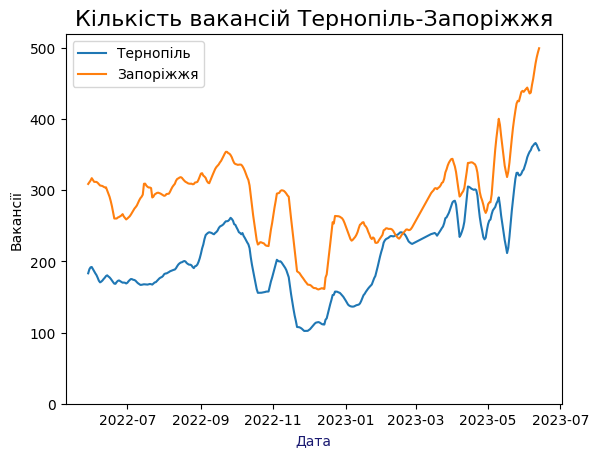

In [78]:
fig, axs =plt.subplots()
axs.plot(df_t.index, df_t['rolling_mean'], label="Тернопіль")
axs.plot(df_z.index, df_z['rolling_mean'], label="Запоріжжя")
plt.title("Кількість вакансій Тернопіль-Запоріжжя", fontsize=16)
plt.xlabel('Дата', color='midnightblue')
plt.ylabel('Вакансії')
plt.ylim(bottom=0)
plt.legend()
plt.show()